In [1]:
import numpy as np
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [2]:
def euler(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    n = len(t) #number of time points
    x = np.zeros(n) #initialize solution array
    x[0] = x0 #first element is the initial value
    h = t[1]-t[0]
    for i in range(1,len(t)):
        x[i] = x[i-1]+h*f(x[i-1],t[i-1]) #forward euler update
    return x

<IPython.core.display.Javascript object>


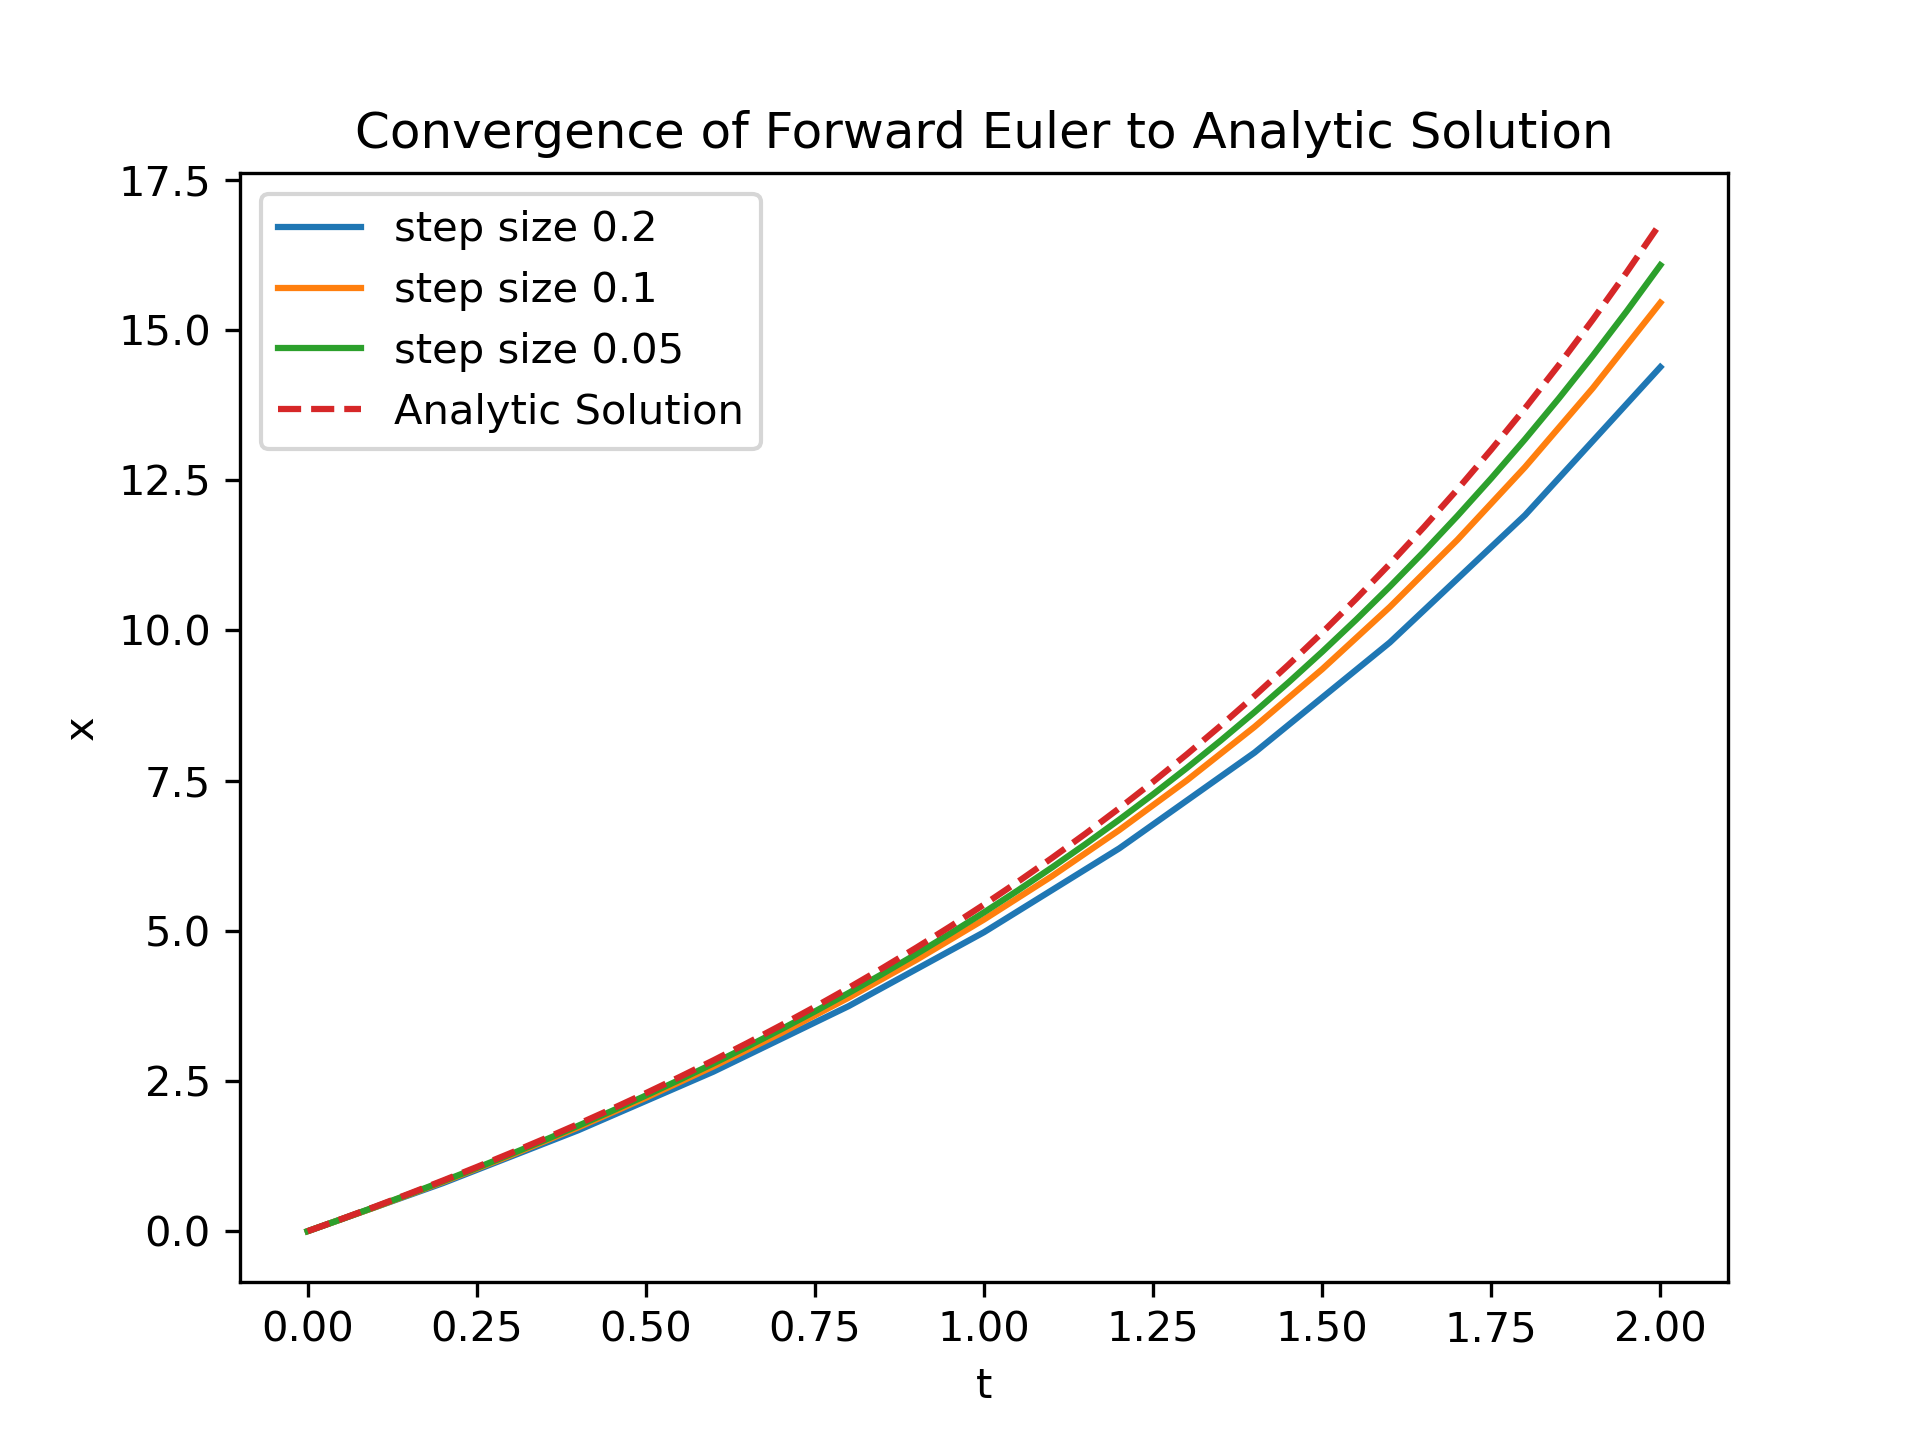

In [3]:
x_prime = lambda x,t: x - 2*t + 4
delt_lst = [0.2,0.1,0.05] #iterate over these step sizes

for h in delt_lst:
    time = np.arange(0,2+h,h) #[0,0.h,0.2h,...,2]
    x0 = 0
    plt.plot(time,euler(x_prime,x0,time),label="step size {}".format(h))

soln = lambda t: -2 + 2*t + 2*np.exp(t) #analytic solution
plt.plot(time,soln(time),label="Analytic Solution",linestyle="dashed")
plt.xlabel("t")
plt.ylabel('x')
plt.title("Convergence of Forward Euler to Analytic Solution")
plt.legend()
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [4]:
def midpoint(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    n = len(t)
    x = np.zeros(n) #initialize solution array
    x[0] = x0 #first element is the initial value
    h = t[1]-t[0]
    
    for i in range(1,len(t)):
        x[i] = x[i-1]+h*f(x[i-1] + (h/2)*f(x[i-1],t[i-1]),t[i-1]+h/2) #midpoint method update
    return x

def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    n = len(t) 
    x = np.zeros(n) #initialize solution array
    x[0] = x0 #first element is the initial value
    h = t[1]-t[0]
    for i in range(1,n):
        k1 = f(x[i-1],t[i-1]) #rk coefficients
        k2 = f(x[i-1]+(h/2)*k1,t[i-1]+(h/2))
        k3 = f(x[i-1]+(h/2)*k2,t[i-1]+(h/2))
        k4 = f(x[i-1]+h*k3,t[i])
        x[i] = x[i-1] + (h/6)*(k1+2*k2+2*k3+k4) #implement the update

    return x

<IPython.core.display.Javascript object>


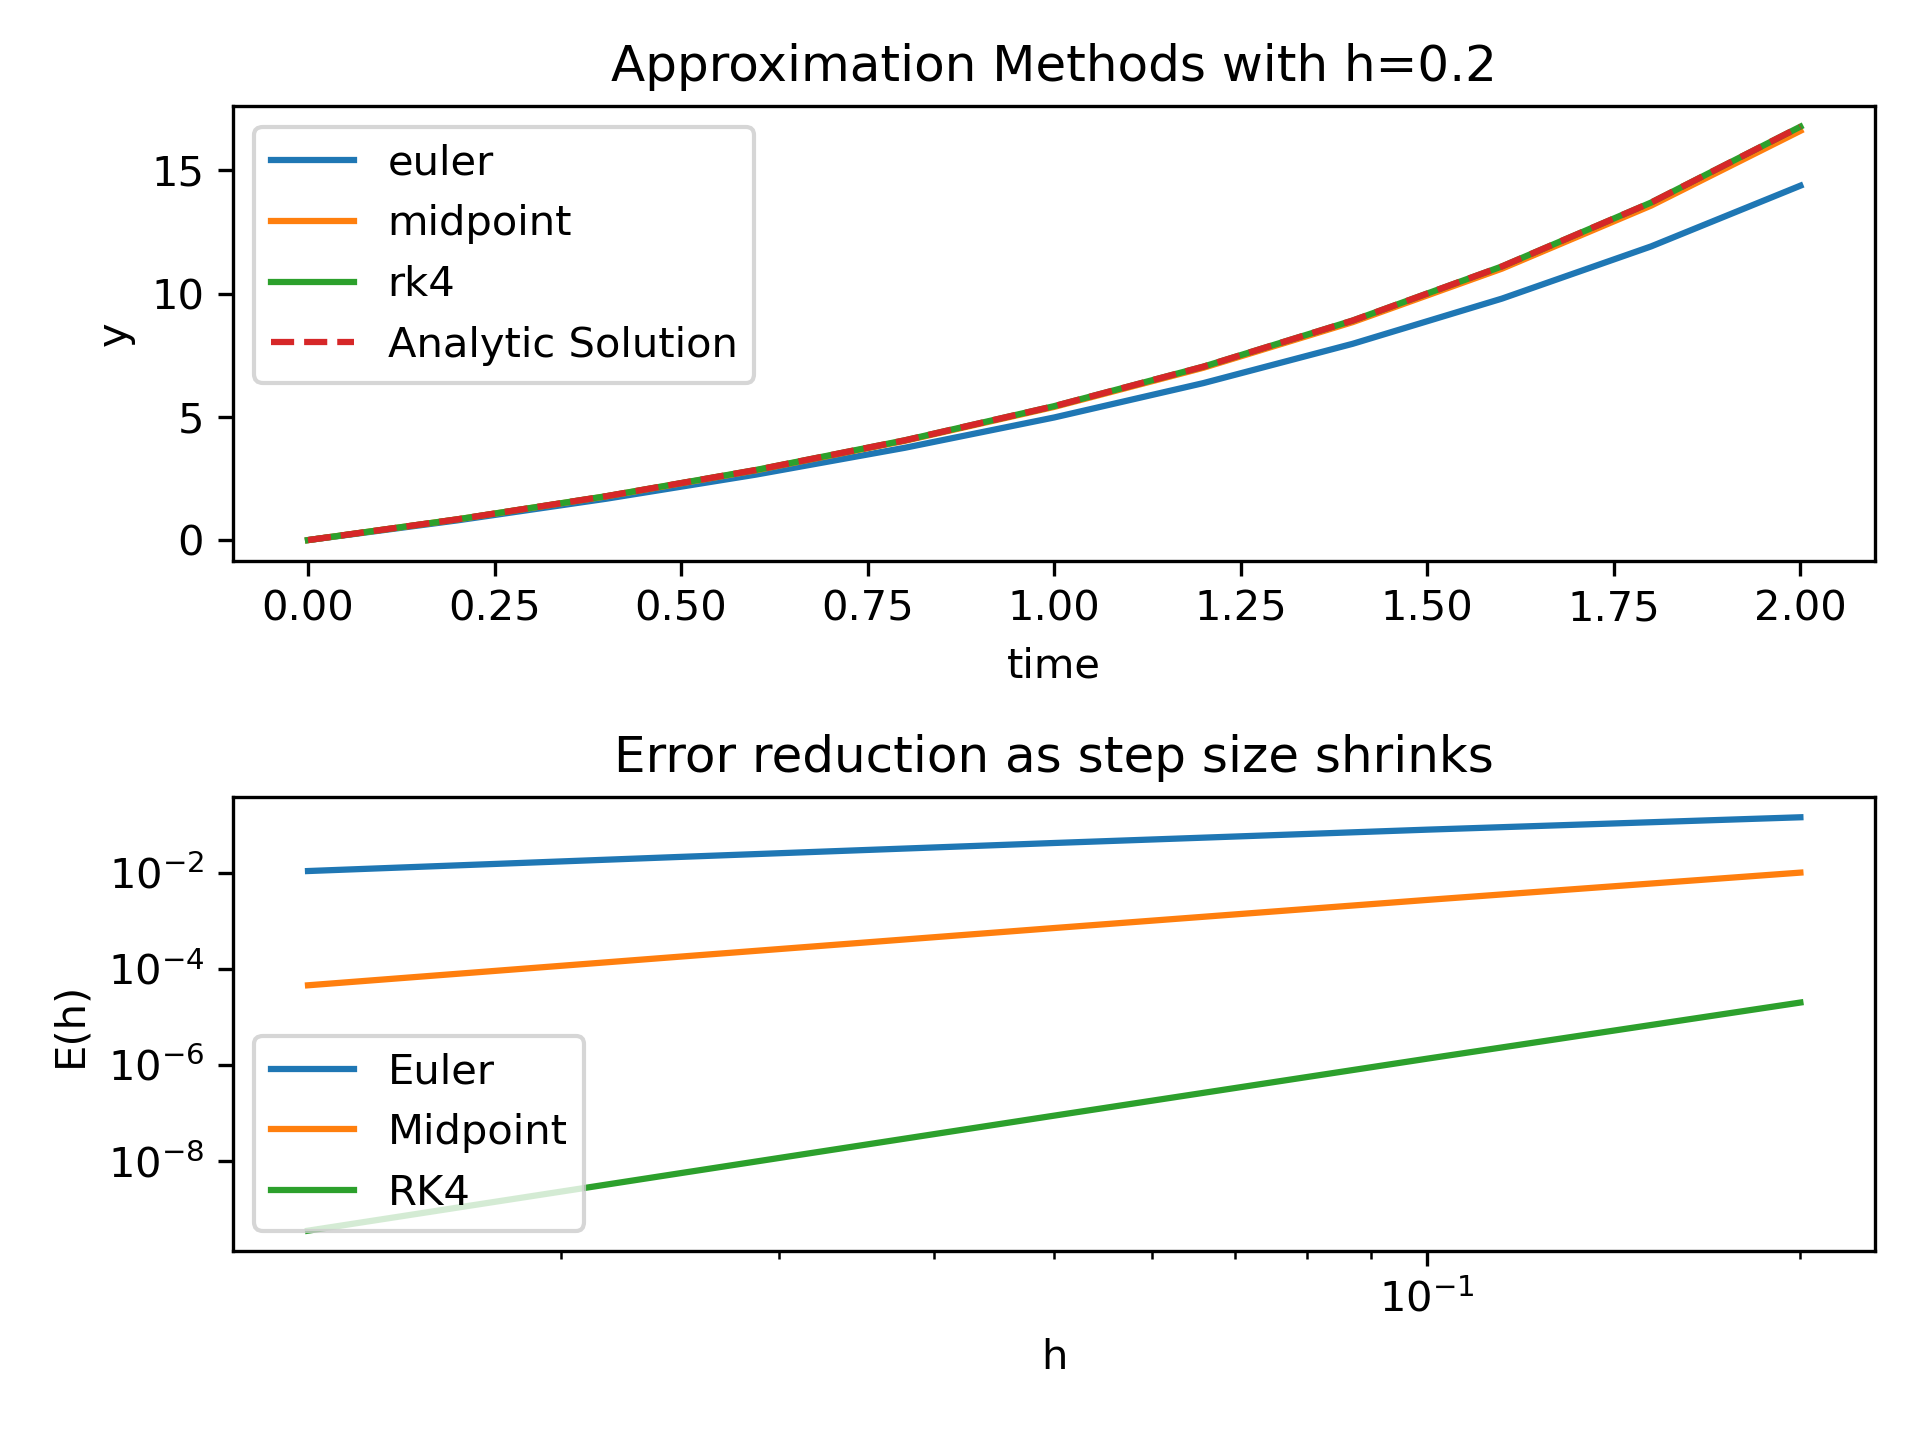

In [5]:
f = lambda x,t: x - 2*t + 4
label_dict = {euler:"euler",midpoint:"midpoint",rk4:"rk4"} #for labelling purposes, maps method to method name

for method in [euler,midpoint,rk4]:
    h = 0.2
    time = np.arange(0,2+h,h) #[.0,.h,.2h,...,2]
    x0 = 0
    plt.subplot(211).plot(time,method(f,x0,time),label=label_dict[method])

plt.subplot(211).plot(time,soln(time),label="Analytic Solution",linestyle="dashed")
plt.title("Approximation Methods with h={}".format(h))
plt.xlabel("time")
plt.ylabel("y")
plt.legend()

soln = lambda t: -2 + 2*t + 2*np.exp(t) #analytic solution
euler_errs,midpoint_errs,rk4_errs = [],[],[]

h_list = [0.2,0.1,0.05,0.025,0.0125] #iterate over these step_sizes

x2 = soln(2)
for h in h_list:
    time = np.arange(0,2+h,h) #[.0,.h,.2h,...,2]
    x0 = 0
    
    x_n = euler(f,x0,time)[-1]
    euler_err = np.linalg.norm(x2-x_n)/np.linalg.norm(x2) #error calculation for euler
    euler_errs.append(euler_err)
    
    x_n = midpoint(f,x0,time)[-1]
    midpoint_err = np.linalg.norm(x2-x_n)/np.linalg.norm(x2) #"..." for midpoint
    midpoint_errs.append(midpoint_err)
    
    x_n = rk4(f,x0,time)[-1]
    rk4_err = np.linalg.norm(x2-x_n)/np.linalg.norm(x2) #"..." for rk4 
    rk4_errs.append(rk4_err)

plt.subplot(212).loglog(h_list,euler_errs,label="Euler") #log x and y axis
plt.subplot(212).loglog(h_list,midpoint_errs,label="Midpoint")
plt.subplot(212).loglog(h_list,rk4_errs,label="RK4")
plt.title("Error reduction as step size shrinks")
plt.xlabel('h')
plt.ylabel('E(h)')
plt.legend()
plt.tight_layout()
plt.show()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

<IPython.core.display.Javascript object>


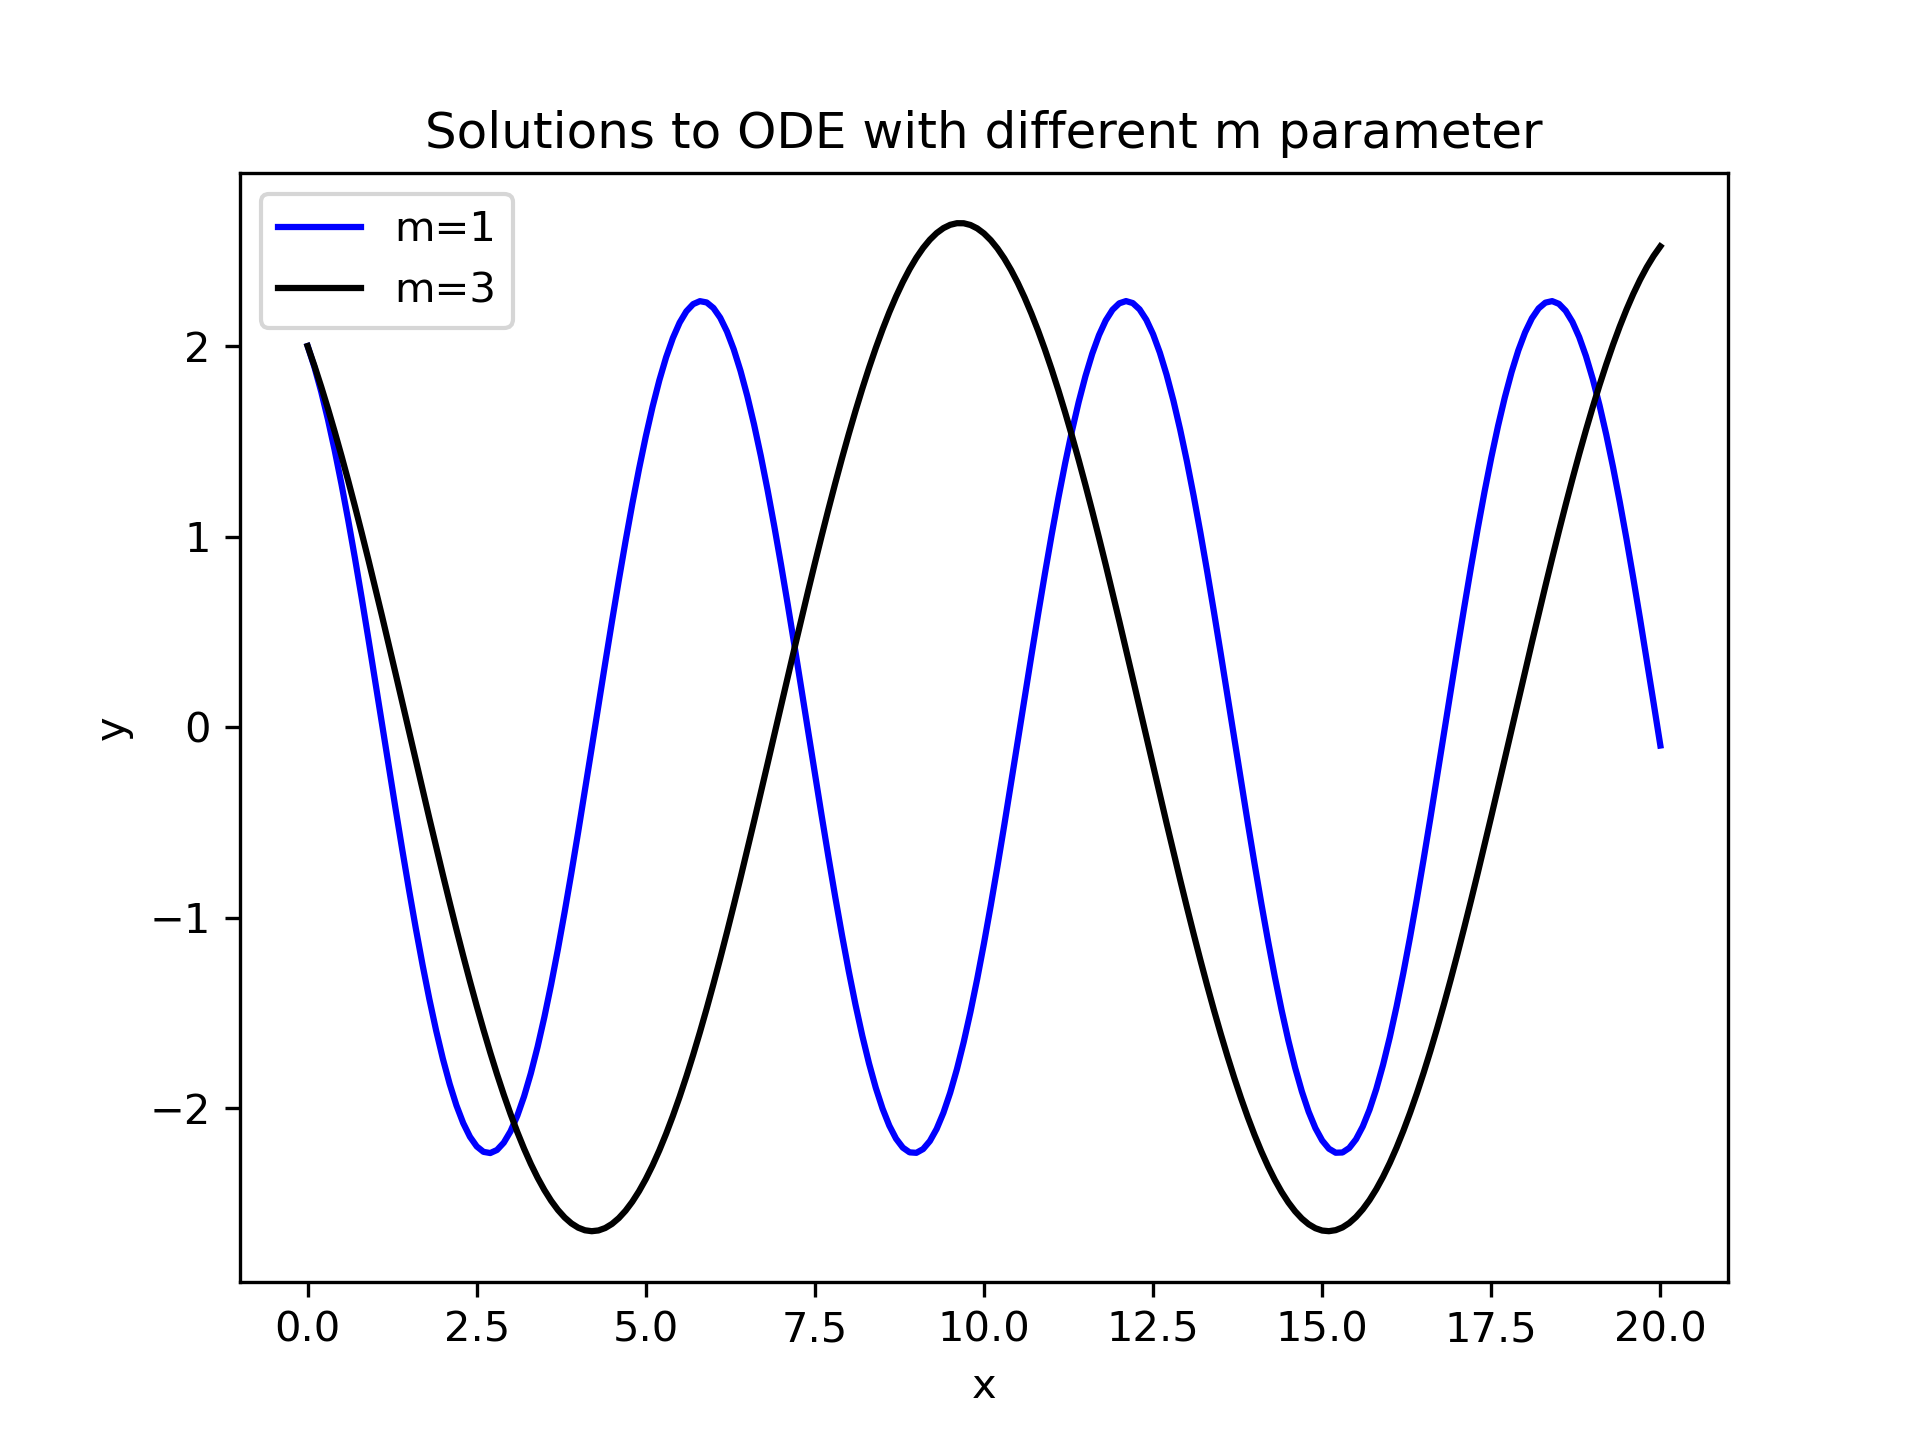

In [6]:
def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    n,m = len(t),len(x0) #number of time points and length of initial value array
    x = np.zeros((n,m)) #solution matrix
    x[0] = x0 #assign initial value to first element of array
    h = t[1]-t[0] #step size
    for i in range(1,n):
        k1 = f(x[i-1],t[i-1]) #rk coefficients
        k2 = f(x[i-1]+(h/2)*k1,t[i-1]+(h/2))
        k3 = f(x[i-1]+(h/2)*k2,t[i-1]+(h/2))
        k4 = f(x[i-1]+h*k3,t[i])
        x[i] = x[i-1] + (h/6)*(k1+2*k2+2*k3+k4) #implement the rk4 update

    return x

m_a,k=1,1
x_prime_a = lambda x,t: np.array([x[1],(-k/m_a)*x[0]]) #first ODE system
m_b,k=3,1
x_prime_b = lambda x,t: np.array([x[1],(-k/m_b)*x[0]]) #second ODE system
x_0 = [2,-1]
t = np.linspace(0,20,201)


soln_1 = rk4(x_prime_a,x_0,t) #solution to first system
soln_2 = rk4(x_prime_b,x_0,t) #solution to second system

plt.plot(t,soln_1[:,0],label="m={}".format(m_a),color="blue")
plt.plot(t,soln_2[:,0],label="m={}".format(m_b),color="black")
plt.title("Solutions to ODE with different m parameter")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

The difference makes sense because the parameters are different. The functions that describe the solution will be different.

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

<IPython.core.display.Javascript object>


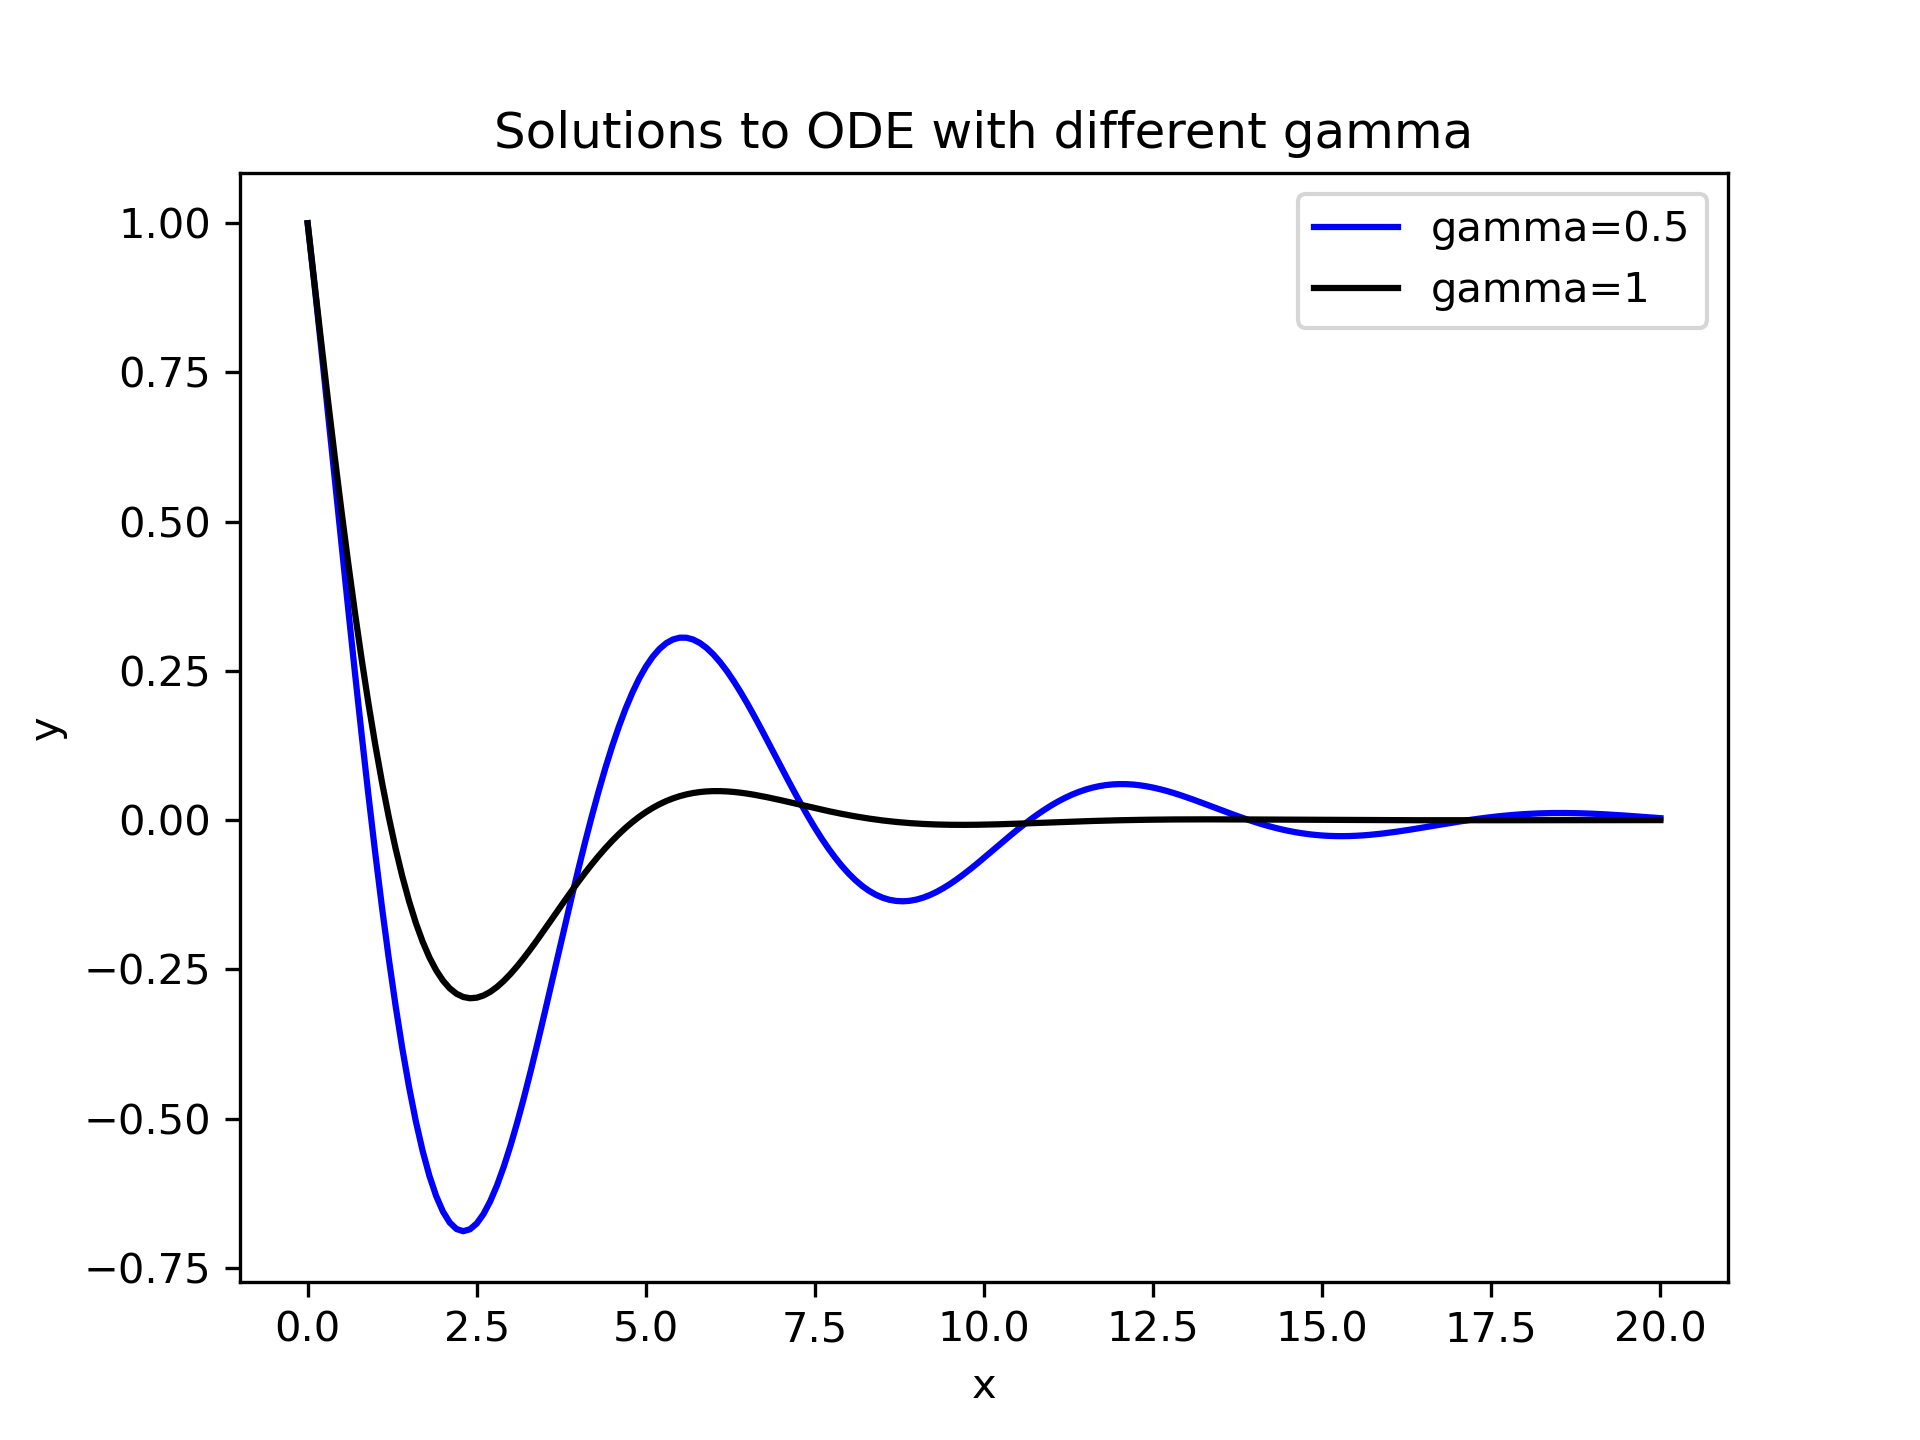

In [7]:
t = np.linspace(0,20,201)
x_0 = [1,-1]

gamma_a = 1/2
gamma_b = 1
x_prime_a = lambda x,t: np.array([x[1],-gamma_a*x[1]-x[0]]) #first ODE system
x_prime_b = lambda x,t: np.array([x[1],-gamma_b*x[1]-x[0]]) #second ODE system

soln_a = rk4(x_prime_a,x_0,t) #soln to first ODE system
soln_b = rk4(x_prime_b,x_0,t) #soln to second ODE system

plt.plot(t,soln_a[:,0],label="gamma={}".format(gamma_a),color="blue")
plt.plot(t,soln_b[:,0],label="gamma={}".format(gamma_b),color="black")
plt.title("Solutions to ODE with different gamma")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

<IPython.core.display.Javascript object>


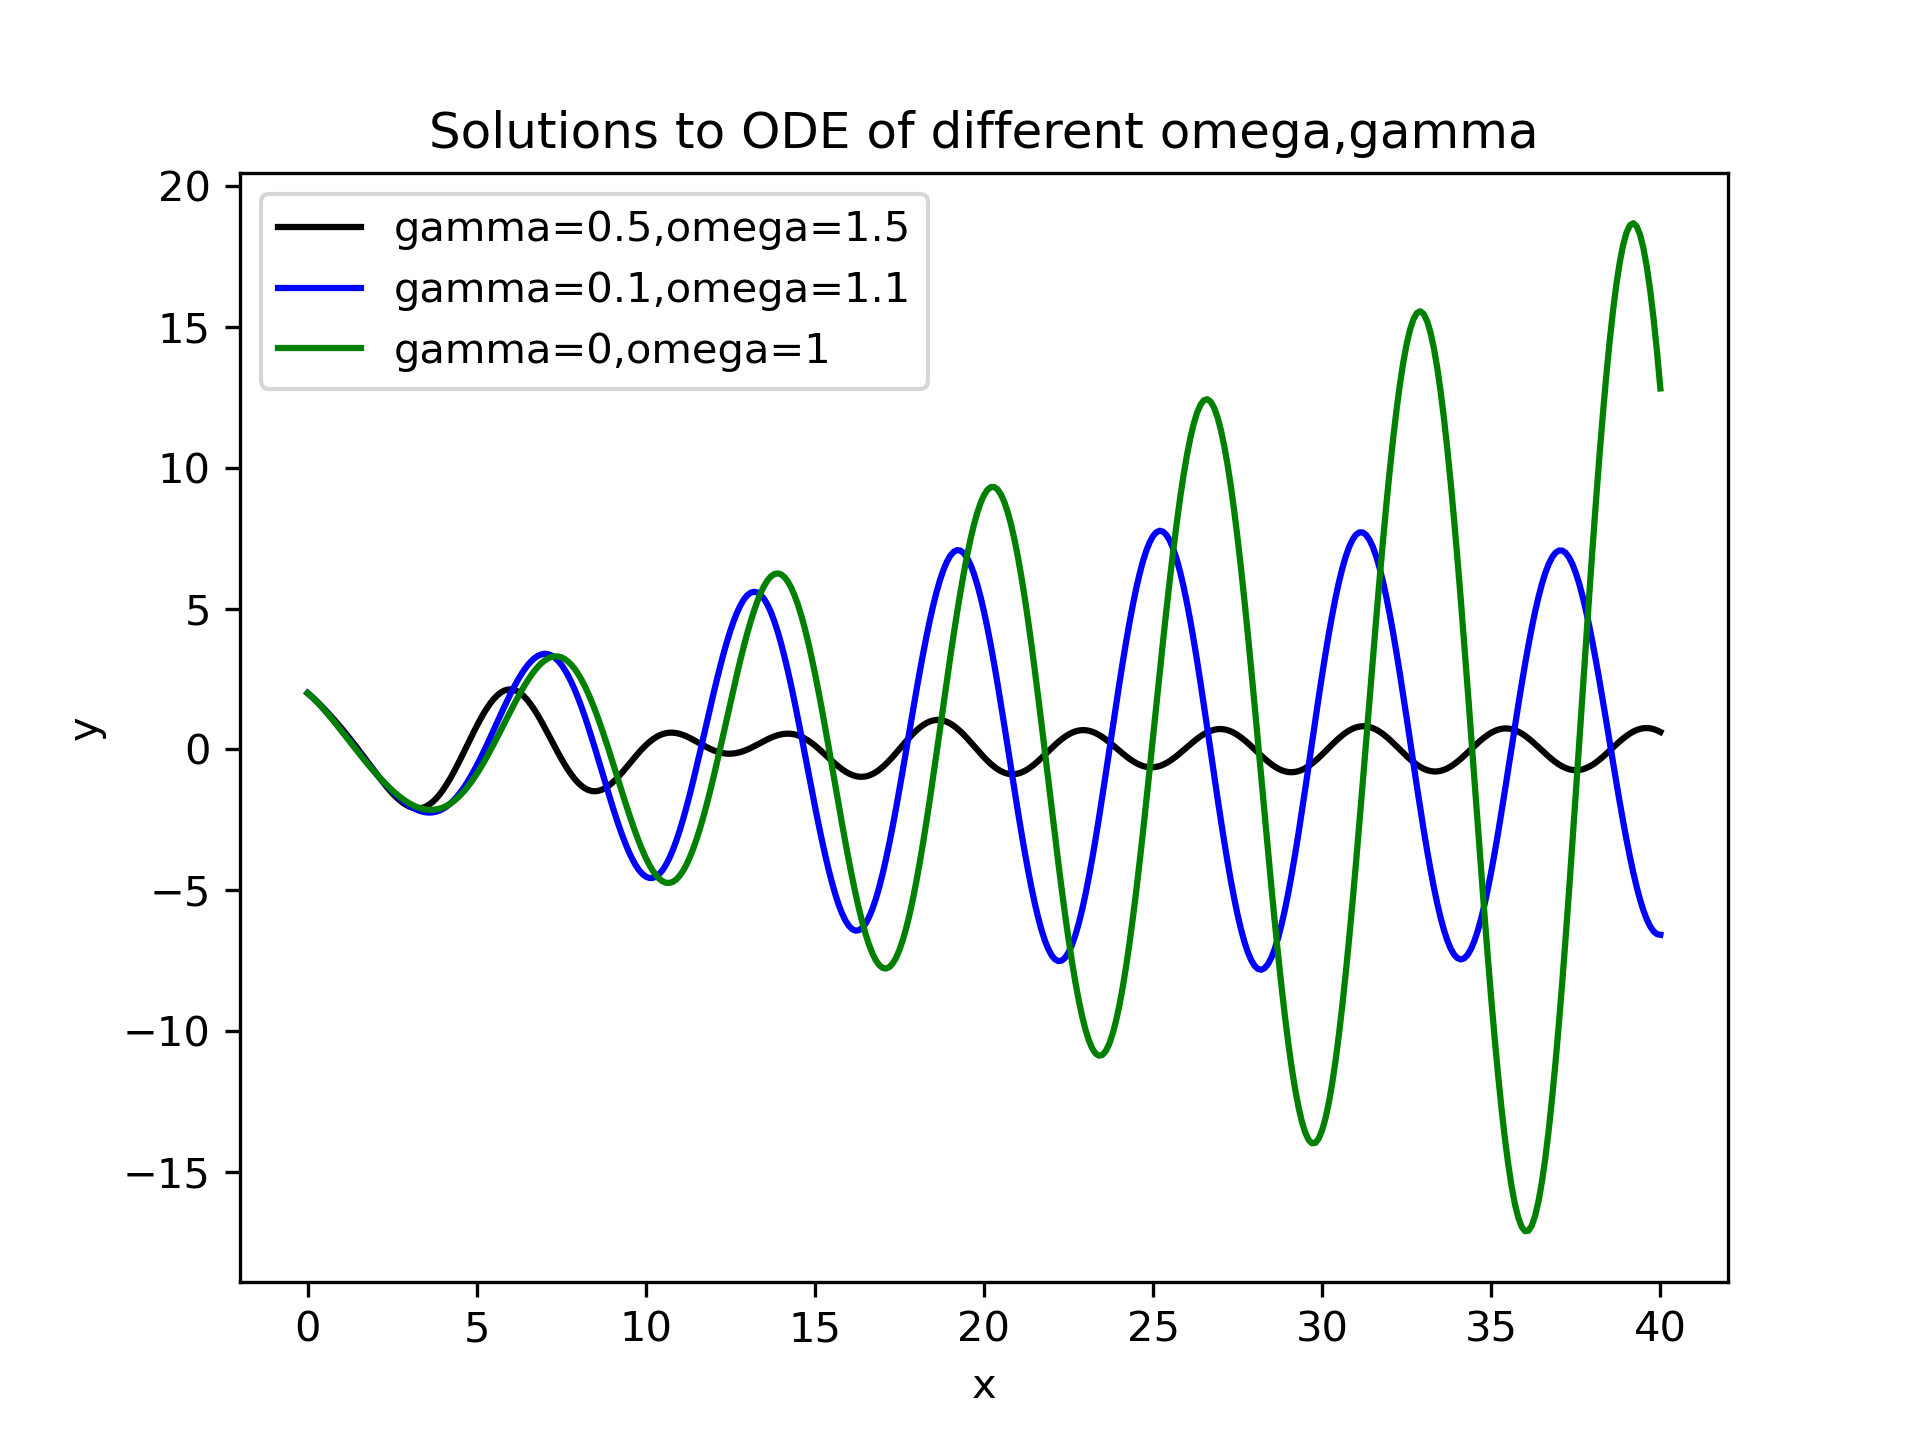

In [8]:
t = np.linspace(0,40,401)
x_0 = np.array([2,-1])

gamma_a,omega_a = 0.5,1.5
gamma_b,omega_b = 0.1,1.1
gamma_c,omega_c = 0,1

#three ODE systems, varying by parameters of gamma,omega
x_prime_a = lambda x,t: np.array([x[1],
                                np.cos(omega_a*t)-(gamma_a/2)*x[1]-x[0]])
x_prime_b = lambda x,t: np.array([x[1],
                                np.cos(omega_b*t)-(gamma_b/2)*x[1]-x[0]])
x_prime_c = lambda x,t: np.array([x[1],
                                np.cos(omega_c*t)-(gamma_c/2)*x[1]-x[0]])

#rk4 solutions of each system
soln_a = rk4(x_prime_a,x_0,t)
soln_b = rk4(x_prime_b,x_0,t)
soln_c = rk4(x_prime_c,x_0,t)

plt.plot(t,soln_a[:,0],label="gamma={},omega={}".format(gamma_a,omega_a),color="black")
plt.plot(t,soln_b[:,0],label="gamma={},omega={}".format(gamma_b,omega_b),color="blue")
plt.plot(t,soln_c[:,0],label="gamma={},omega={}".format(gamma_c,omega_c),color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solutions to ODE of different omega,gamma")
plt.legend()
plt.show()